In [22]:
%matplotlib inline

In [2]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
#import scikitplot as skplt
import datetime

# Human Activity Recognition with Smartphones
## Can smarthone predict our action ? <br>
### author David Stankov -  daodeiv

### Abstract

####  In the notebook we will try to show that the smartphones can predict our action by Support Vector Machine with accuracy approximately equal to 90%.Also, we will show the power of Principle Component Analysis as decrease dimension of our dataset from 563 columns to 25

### Introduction
#### The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.Each person performed six activities wearing a smartphone (Samsung Galaxy S II) on the waist Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz.The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity.

### Data Load and  Exploration

In [4]:
train = pd.read_csv('https://disk.bg/s/UFQtiaqlTDj2SZX/download')  # train data 
test = pd.read_csv('https://disk.bg/s/VYmtGL4lzcHdcCl/download')   # test data

In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [168]:
train.shape

(7352, 563)

In [122]:
# separating data inputs and output lables 
train_data  = train.drop('Activity' , axis=1).values
label_data = train['Activity'].values

test_data = test.drop('Activity' , axis=1).values
test_label = test['Activity'].values


print('train data shape ' ,train_data.shape)
print('label data shape' ,label_data.shape)

print('train data test shape' ,test_data_.shape)
print('label_data_test shape' ,label_test_train.shape)

train data shape  (7352, 562)
label data shape (7352,)
train data test shape (2947, 562)
label_data_test shape (2947,)


In [18]:
activity = np.unique(label_data)
activity

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

### Feature Selection

#### Since some of feature maybe depends each other  are unnecessary.Others have a small variance and they unnecessary as  well.Before  we apply dimensionality reduction over data sets,will be bettet to scalling data, The origin data  maybe is scalled enough nevertheless let's to apply standart scaller

#### The statistical Description before Scalling

In [7]:
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [24]:
###applying standart scaller over test and train data
scaler = StandardScaler()
scaler.fit(train_data)
train_data = a.transform(train_data)
scaler.fit(test_data)
test_data = a.transform(test_data)

### The statistical Description after Scalling


In [25]:
pd.DataFrame(train_data).describe()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
count,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,...,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03
mean,-3.166975e-16,3.384504e-17,9.365619e-17,-1.226198e-16,-1.977472e-16,1.596474e-16,7.520281e-18,1.987287e-16,1.078209e-16,1.359087e-17,...,-7.505558e-17,3.100077e-16,-1.525198e-18,5.899287e-18,-1.418547e-17,7.106515e-17,1.277089e-16,-1.075189e-17,-2.398788e-17,-4.450073e-15
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,...,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-1.814049e+01,-2.407152e+01,-1.573085e+01,-8.793362e-01,-9.727918e-01,-9.440787e-01,-8.713436e-01,-9.736247e-01,-9.511122e-01,-9.759168e-01,...,-2.144460e+00,-1.217541e+00,-2.925683e+00,-2.235646e+00,-1.658375e+00,-2.079788e+00,-9.974223e-01,-3.558777e+00,-3.380417e+00,-1.828851e+00
25%,-1.638693e-01,-1.756427e-01,-2.092798e-01,-8.631868e-01,-9.295295e-01,-8.968638e-01,-8.562288e-01,-9.286823e-01,-9.034203e-01,-8.587814e-01,...,-7.339585e-01,-7.162086e-01,-3.866541e-01,-6.507937e-01,-8.072166e-01,-7.749059e-01,-6.301983e-01,-2.571022e-01,-3.113525e-01,-1.048866e+00
50%,3.850502e-02,1.167141e-02,8.206943e-03,-7.594273e-01,-6.783764e-01,-6.081593e-01,-7.551036e-01,-6.800064e-01,-6.061248e-01,-7.585419e-01,...,-1.142597e-01,-2.809130e-01,2.451015e-03,1.507318e-02,1.477537e-05,1.174412e-02,-4.296252e-01,4.151086e-01,2.138846e-01,1.768243e-01
75%,1.988854e-01,1.693906e-01,2.003738e-01,8.081625e-01,9.484617e-01,8.177048e-01,7.966913e-01,9.471052e-01,8.222278e-01,8.291412e-01,...,5.608611e-01,3.947685e-01,4.222002e-01,6.484291e-01,8.178415e-01,7.644196e-01,-3.816570e-02,6.379332e-01,5.882181e-01,9.568092e-01
max,1.032661e+01,2.493878e+01,1.958529e+01,3.577947e+00,2.839526e+00,3.833088e+00,3.845150e+00,3.075829e+00,3.878713e+00,2.697113e+00,...,4.039226e+00,5.144111e+00,2.943656e+00,2.225893e+00,1.627550e+00,2.096610e+00,2.910568e+00,1.410491e+00,3.785390e+00,1.402515e+00


#### Principle Component Analysis (PCA)

In [29]:
pca = PCA()
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
explained_variance = pca.explained_variance_
explained_variance

array([2.84930325e+02, 3.69243458e+01, 1.57507387e+01, 1.40490859e+01,
       1.05949597e+01, 9.68544219e+00, 7.69311009e+00, 6.76026306e+00,
       5.60228319e+00, 5.41511781e+00, 4.82719085e+00, 4.49415468e+00,
       4.31193538e+00, 3.63933007e+00, 3.55946718e+00, 3.36519066e+00,
       3.29654827e+00, 3.22847767e+00, 3.18970865e+00, 2.95887970e+00,
       2.80980896e+00, 2.74079369e+00, 2.71125901e+00, 2.63313858e+00,
       2.52956399e+00, 2.37408006e+00, 2.34830341e+00, 2.28449435e+00,
       2.19636391e+00, 2.17231340e+00, 2.05615542e+00, 1.98962107e+00,
       1.96648920e+00, 1.89276521e+00, 1.86209602e+00, 1.84196575e+00,
       1.80737671e+00, 1.65891109e+00, 1.61500408e+00, 1.60016979e+00,
       1.52943070e+00, 1.49096019e+00, 1.47791107e+00, 1.45307239e+00,
       1.40087449e+00, 1.38560980e+00, 1.35116808e+00, 1.32972514e+00,
       1.30907024e+00, 1.27755458e+00, 1.24354645e+00, 1.20673863e+00,
       1.16538397e+00, 1.13925345e+00, 1.12133709e+00, 1.11596533e+00,
      

### !!!! Ploting 3D dimensilay

In [63]:
print('min value of variance ' ,explained_variance.min())
print('max value of variance ' ,explained_variance.max())
print('std of variance array ' ,explained_variance.std())
print('count of variance array ' ,explained_variance.size)

min value of variance  1.64066611022484e-32
max value of variance  284.9303245033929
std of variance array  12.160217531518953
count of variance array  562


#### Let's to investigate components to find the smallest count of component which are the most important and can describe the data,without losing the necessary info

Text(0.5, 1.0, 'distribution of variance of component')

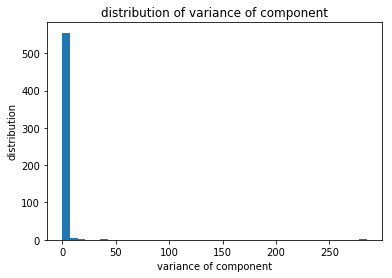

In [57]:
plt.hist(explained_variance,bins=40)
plt.xlabel('variance of component')
plt.ylabel('distribution')
plt.title('distribution of variance of component')

In [92]:
def description_variance(limit):
    """
    limit -the limit of distribution
    
    """
    explained_variancel_less_then_10 = explained_variance[explained_variance<limit]
    plt.hist(explained_variancel_less_then_10,bins=40)
    plt.xlabel('variance of component')
    plt.ylabel('distribution')

    plt.title('distribution of variance of component less then '+str(limit))
    size = explained_variancel_less_then_10.size
    print('the count of variance of component less then '+str(limit) + ' are',size)  
    size = explained_variance[explained_variance>limit].size 
    print('the count of variance of component more then '+str(limit) + ' are',size)  
    plt.show()                    

        
# def plot_sublot(number,variance):
#     fig.suptitle('Vertically stacked subplots')
#     explained_variancel_less_then=variance[explained_variance<limit]
#     explained_variancel_more_then=variance[explained_variance>limit]
#     axs[0].hist(explained_variancel_less_then)
#     axs[1].hist(explained_variancel_more_then)
#     axs[0].xlabel('variance of component')
#     axs[1].ylabel('distribution of variance less then '+str(limit))
    
    
# def decription(interval,variance):
#     fig, axs = plt.subplots(2)
    
    
   

#### Let's to see distributions of variance of component ,when variaces are less the 50,10,5,0.5,0.2

the count of variance of component less then 50 are 561
the count of variance of component more then 50 are 1


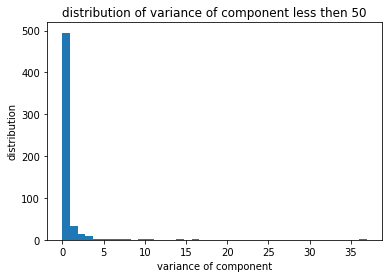

the count of variance of component less then 10 are 557
the count of variance of component more then 10 are 5


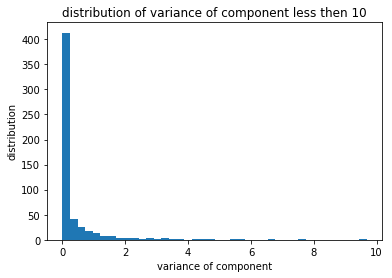

the count of variance of component less then 5 are 552
the count of variance of component more then 5 are 10


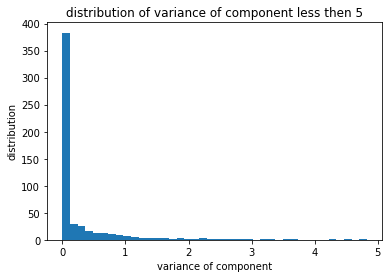

In [104]:
for i in [50,10,5] :
    description_variance(i) 

#### from above graphics distribution ,maybe the significant component is the first components more then approsimatly 2.5

the count of variance of component less then 2.5 are 537
the count of variance of component more then 2.5 are 25


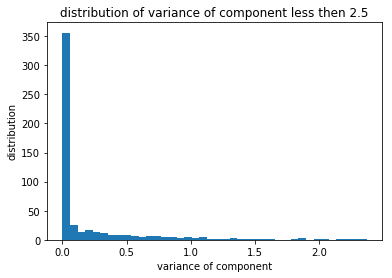

In [107]:
description_variance(2.5) 

### The the count components with variace more then 2.5 are 25,we will train our model only over this component.For now we reduce the number of component from 562 to 25 ,which is significant reduction 

### let to get the first 25 principle components analysis

In [115]:
tranformed_train_data = pca.transform(train_data)
tranformed_data_test= pca.transform(test_data)

tranformed_train_data = tranformed_data_train[:,:25]
tranformed_data_test = tranformed_data_test[:,:25]

kernel_svc = SVC(kernel="rbf")
#kernel_svc.fit(tranformed_data_train,tranformed_data_test)
kernel_svc.fit(tranformed_data_train,label_data)

/home/daodeiv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [116]:
print('shape tranformed train data ',tranformed_train_data.shape)

shape tranformed train data  (7352, 25)


### Predictive Modelling
#### To train we will use Suppor Vector Mashime

In [120]:
svc = LinearSVC(C=1e9)
svc.fit(tranformed_train_data,label_data)

/home/daodeiv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [125]:
svc.score(tranformed_data_test,test_label)

0.8500169664065151

#### With linear SVM we achieve $0.85$ acuurancy.Let to try what will happen with  radiues base kernel


In [128]:
kernel_svc = SVC(kernel="rbf")
kernel_svc.fit(tranformed_train_data,label_data)

/home/daodeiv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [129]:
kernel_svc.score(tranformed_data_test,test_label)

0.7750254496097726

#### With radius base kernel SVM we achieve $0.77$ acuurancy.Which is more bad then linear,but we didn't use tuning of hyper parrameters.In next section we will try to improve our model by tunnint hyperparameters

### Tuning HyperParameter (SVM)

In [198]:
param_grid = {'C':[100,1000],'kernel':['linear','rbf'],'gamma':[0.0001,0.00001]} ##  'kernel':['linear','rbf'] 'gamma':[1,0.1,0.001,0.0001]
grid = GridSearchCV(SVC(kernel="rbf"),param_grid)
grid.fit(tranformed_train_data,label_data)


/home/daodeiv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': [0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [169]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [207]:
kernel_svc = SVC(kernel="rbf",C=100,gamma=0.0001)
kernel_svc.fit(tranformed_train_data,label_data)
kernel_svc.score(tranformed_data_test,test_label)

0.8883610451306413

0.8883610451306413

In [162]:
kernel_svc = SVC(kernel="rbf",C=1e9)
kernel_svc.fit(tranformed_train_data,label_data)

/home/daodeiv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)